# Fractales de Newton 
Presentado por: David Eslava, Juan Montoya y Juan Vargas

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

# $z^3-2z+2$

In [2]:
def f(z):
  resultado1= (z**3) - (2*z) +2
  return resultado1

In [3]:
def df(z):
  resultado1= (3*(z**2)) - 2
  return resultado1

In [4]:
z = Symbol('z')
fz= (z**3) - (2*z) +2
raices = solveset(fz, z)
raices #mostrará las soluciones tanto complejas como reales del polinomio

{-(3*sqrt(57) + 27)**(1/3)/3 - 2/(3*sqrt(57) + 27)**(1/3), (3*sqrt(57) + 27)**(-1/3) + (3*sqrt(57) + 27)**(1/3)/6 + I*(-sqrt(3)/(3*sqrt(57) + 27)**(1/3) + sqrt(3)*(3*sqrt(57) + 27)**(1/3)/6), (3*sqrt(57) + 27)**(-1/3) + (3*sqrt(57) + 27)**(1/3)/6 + I*(-sqrt(3)*(3*sqrt(57) + 27)**(1/3)/6 + sqrt(3)/(3*sqrt(57) + 27)**(1/3))}

In [5]:
def iterationnewton(titulo, z): #esta función se usará ara graficar las iteraciones del método de newton raphson, recibe titulo que es un string del titulo de la gráfica y z el cual es el número complejo del valor inicial
  r=[]
  i=[]
  for k in range(50):
    dz = df(z)
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title(titulo)
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imagnary part')
  plt.show()

In [6]:
def graficar(liminf, limsup, interval, titulo):
  x = np.linspace(liminf,limsup,interval)
  fig, ax = plt.subplots()
  ax.plot(x,f(x))
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title(titulo)
  plt.xlabel('x')
  plt.ylabel('f1(x)')

In [7]:


def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = -1.7693
    r2 = complex(0.88465, -0.58974)
    r3 = complex(0.88465, 0.58974)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(z)=(z^3) - 2z + 2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Z region from ( -3.0 , -3.0 ) to ( 3.0 , 3.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


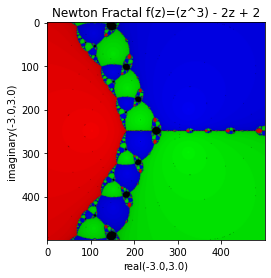

In [8]:
display1(z_c_r=0, z_c_i=0,zoom=6)

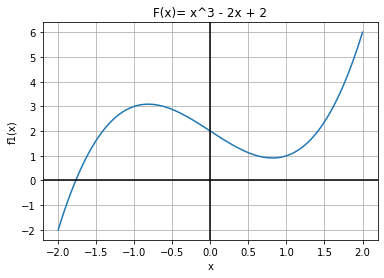

In [9]:
graficar(-2,2,100, 'F(x)= x^3 - 2x + 2')

## Newton iterates form z=10.0 + 0.0j

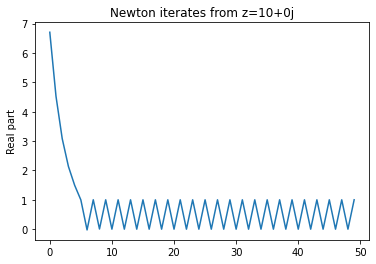

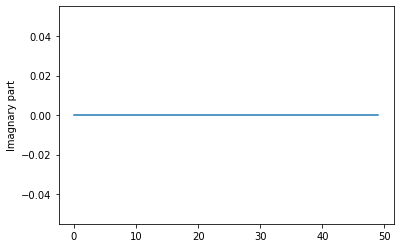

In [10]:
z=10.0 + 0.0j
iterationnewton('Newton iterates from z=10+0j', z)

## Newton iterates form z=-10.0 + 10.0j

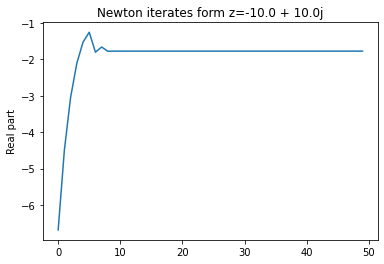

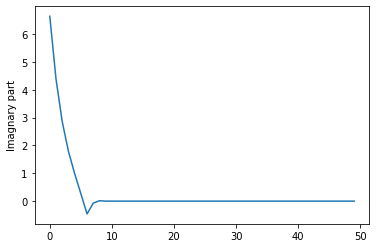

In [11]:
z=-10.0 + 10.0j
iterationnewton('Newton iterates form z=-10.0 + 10.0j', z)

## Newton iterates form z= 10.0 - 10.0j



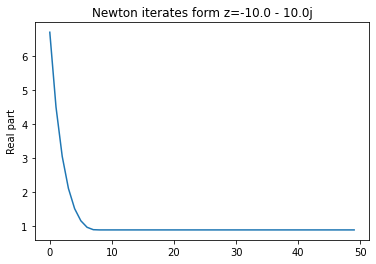

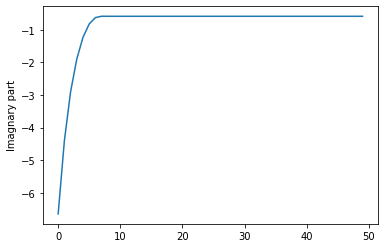

In [12]:
z=10.0 - 10.0j
iterationnewton('Newton iterates form z=-10.0 - 10.0j', z)

# $x^8 +15x^4 -16$

In [13]:
def f(x):
  resultado= x**8 +(15*x**4) -16
  return resultado

In [14]:
def df(x):
  resultado= 8*x**7+(15*4*x**3)
  return resultado

In [15]:
x = Symbol('x')
fx= x**8+(15*x**4) -16
raices = solveset(fx, x)
raices #mostrará las soluciones tanto complejas como reales del polinomio

{-1, 1, -I, I, -sqrt(2) - sqrt(2)*I, -sqrt(2) + sqrt(2)*I, sqrt(2) - sqrt(2)*I, sqrt(2) + sqrt(2)*I}

In [16]:
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = -1
    r2 = 1
    r3 = complex(0,-1)
    r4 = complex(0,1)
    r5 = complex(-math.sqrt(2),-math.sqrt(2))
    r6 = complex(-math.sqrt(2),math.sqrt(2))
    r7 = complex(math.sqrt(2),-math.sqrt(2))
    r8 = complex(math.sqrt(2),math.sqrt(2))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                elif abs(z-r4)<= eps:
                    pixels[height-y-1,x] = (255 - count*multcol, 153, 51)
                elif abs(z-r5)<= eps:
                    pixels[height-y-1,x] = (76, 255 - count*multcol, 111)
                elif abs(z-r6)<= eps:
                    pixels[height-y-1,x] = (255, 206 ,255 - count*multcol)
                elif abs(z-r7)<= eps:
                    pixels[height-y-1,x] = (242, 255 - count*multcol, 64)
                elif abs(z-r8)<= eps:
                    pixels[height-y-1,x] = (255 - count*multcol,64,242)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
    return pixels
def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=x^8+15x-16')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Z region from ( -1.03 , -1.03 ) to ( -0.99 , -0.99 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


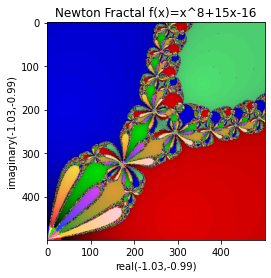

In [17]:
display1(z_c_r=-1.01, z_c_i=-1.01,zoom=1/25)

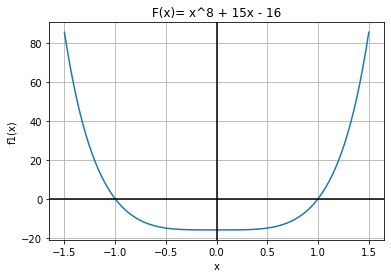

In [18]:
graficar(-1.5,1.5,200,'F(x)= x^8 + 15x - 16')

## Newton iterates form z=10.0 + 0.0j

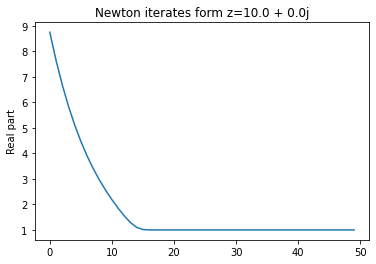

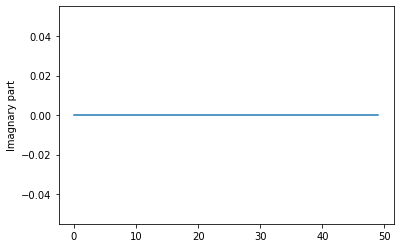

In [19]:
z= 10 +0j
iterationnewton('Newton iterates form z=10.0 + 0.0j', z)

# Newton iterates form z=10.0 - 10.0j

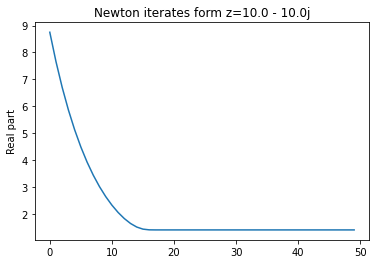

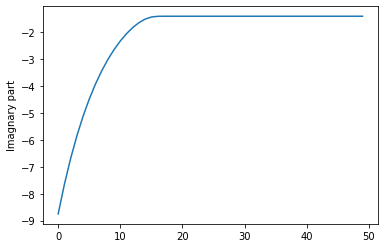

In [20]:
z = 10 -10j
iterationnewton('Newton iterates form z=10.0 - 10.0j', z)

# $z^6+z^3-1$

Primero se hara uso d esta variable auxiliar que representa la potencia compleja

In [21]:
def f(z):
  resultado1= z**6 + z**3 -1
  return resultado1

In [22]:
def df(z):
  resultado1= (6*z**5)+(3*z**2)
  return resultado1

In [23]:
z = Symbol('z')
fz= z**6 + z**3 -1
solveset(fz, z)

{(-1/2 + sqrt(5)/2)**(1/3), -(1/2 + sqrt(5)/2)**(1/3), -(-1/2 + sqrt(5)/2)**(1/3)/2 - sqrt(3)*I*(-1/2 + sqrt(5)/2)**(1/3)/2, -(-1/2 + sqrt(5)/2)**(1/3)/2 + sqrt(3)*I*(-1/2 + sqrt(5)/2)**(1/3)/2, (1/2 + sqrt(5)/2)**(1/3)/2 - sqrt(3)*I*(1/2 + sqrt(5)/2)**(1/3)/2, (1/2 + sqrt(5)/2)**(1/3)/2 + sqrt(3)*I*(1/2 + sqrt(5)/2)**(1/3)/2}

In [24]:
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = -(0.5+(math.sqrt(5)/2))**(1/3)
    r2 = (-0.5+(math.sqrt(5)/2))**(1/3)
    r3 = complex(-(-0.5 + math.sqrt(5)/2)**(1/3)/2, -math.sqrt(3)*(-0.5 + math.sqrt(5)/2)**(1/3)/2)
    r4 = complex(-(-0.5 + math.sqrt(5)/2)**(1/3)/2, math.sqrt(3)*(-0.5 + math.sqrt(5)/2)**(1/3)/2)
    r5 = complex((0.5 + math.sqrt(5)/2)**(1/3)/2, -math.sqrt(3)*(0.5 + math.sqrt(5)/2)**(1/3)/2)
    r6 = complex((0.5 + math.sqrt(5)/2)**(1/3)/2, math.sqrt(3)*(0.5 + math.sqrt(5)/2)**(1/3)/2)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                elif abs(z-r4)<= eps:
                    pixels[height-y-1,x] = (255 - count*multcol, 153, 51)
                elif abs(z-r5)<= eps:
                    pixels[height-y-1,x] = (76, 255 - count*multcol, 111)
                elif abs(z-r6)<= eps:
                    pixels[height-y-1,x] = (255, 206 ,255 - count*multcol)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(z)= z^6+z^3-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


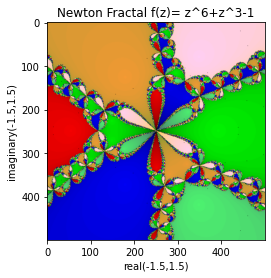

In [25]:
display1(zoom=3)

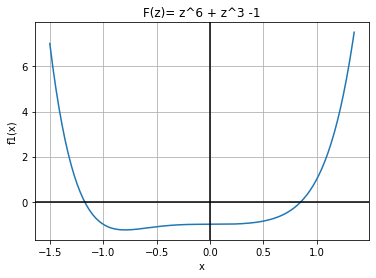

In [33]:
graficar(-1.5,1.35, 200, 'F(z)= z^6 + z^3 -1')

# Newton iterates form z=10.0 + 0.0j

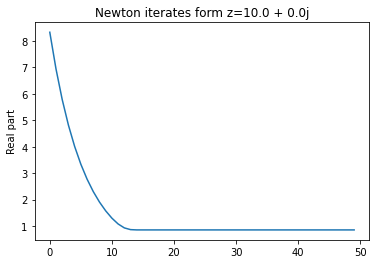

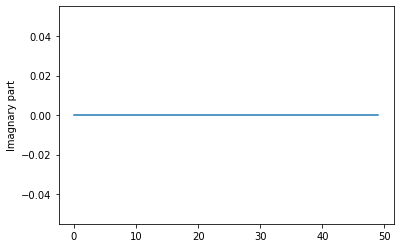

In [26]:
z= 10+0j
iterationnewton('Newton iterates form z=10.0 + 0.0j', z)

# Newton iterates form z=10.0 + 10.0j

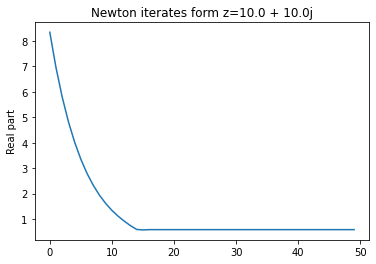

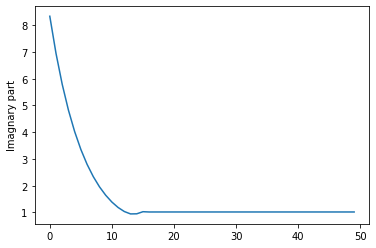

In [27]:
z= 10+10j
iterationnewton('Newton iterates form z=10.0 + 10.0j', z)

# Newton iterates form z=10.0 - 10.0j

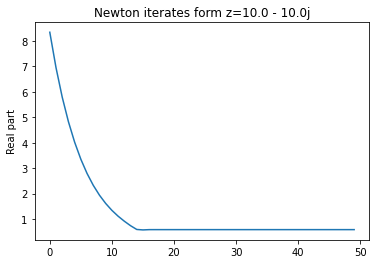

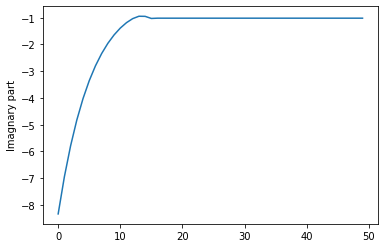

In [28]:
z= 10-10j
iterationnewton('Newton iterates form z=10.0 - 10.0j', z)